# Model Testing
---
---
### *Commented out models that would take a long time to run; results are in the commented out portions too.*

# Sources and Adaptations From
---

In [1]:
# Various modeling lessons and breakfast hours from DSI 523
# https://medium.com/towards-data-science/loss-functions-and-their-use-in-neural-networks-a470e703f1e9
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber
# https://towardsdatascience.com/what-is-batch-normalization-46058b4f583
# https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model
# https://machinelearningmastery.com/xgboost-for-regression/
# https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97

# Imports
---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.losses import MeanAbsoluteError, Huber

In [3]:
a_df = pd.read_csv('../data/average/a_df.csv')
h_df = pd.read_csv('../data/high/h_df.csv')

# Average Cycling Performance Model Testing
---

In [4]:
a_df.head()

,timestamp,latitude,longitude,elevation,dt,heart_rate,bearing,time_diff_s,total_time_s,ele_diff_m,total_ele_change_m,lat_lon,dist_diff_km,total_dist_km,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg
0,2022-07-20 16:07:45+00:00,38.773466,-121.363686,35.799999,1658333265,78,0.000000,0,0,0.000000,0.0,"(38.77346634864807, -121.36368582956493)",0.0000,0.0000,297.65,297.17,1019,39,282.80,1,0.45,177
1,2022-07-20 16:07:46+00:00,38.773542,-121.363672,35.599998,1658333266,79,8.292053,1,1,-0.200001,-0.2,"(38.77354153431952, -121.36367183178663)",0.0084,0.0084,297.65,297.17,1019,39,282.80,1,0.45,177
2,2022-07-20 16:07:49+00:00,38.773630,-121.363682,35.200001,1658333269,82,-5.321180,3,4,-0.399998,-0.6,"(38.77363029867411, -121.36368239298463)",0.0099,0.0183,297.65,297.17,1019,39,282.80,1,0.45,177
3,2022-07-20 16:07:51+00:00,38.773789,-121.363733,35.000000,1658333271,83,-13.956066,2,6,-0.200001,-0.8,"(38.77378871664405, -121.36373268440366)",0.0181,0.0364,297.67,297.17,1019,38,282.43,1,0.45,177
4,2022-07-20 16:07:52+00:00,38.773786,-121.363766,35.000000,1658333272,83,-96.936537,1,7,0.000000,-0.8,"(38.77378553152084, -121.36376612819731)",0.0029,0.0393,297.67,297.17,1019,38,282.43,1,0.45,177


## X, y, train_test_split
---

In [5]:
a_df.columns

Index(['timestamp', 'latitude', 'longitude', 'elevation', 'dt', 'heart_rate',
       'bearing', 'time_diff_s', 'total_time_s', 'ele_diff_m',
       'total_ele_change_m', 'lat_lon', 'dist_diff_km', 'total_dist_km',
       'temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'clouds',
       'wind_speed', 'wind_deg'],
      dtype='object')

In [6]:
a_features = ['elevation', 'bearing', 'time_diff_s', 'total_time_s', 'ele_diff_m',
       'total_ele_change_m', 'dist_diff_km', 'total_dist_km',
       'temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'clouds',
       'wind_speed', 'wind_deg']
a_X = a_df[a_features]
a_y = a_df['heart_rate']

a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X, a_y, random_state = 42)

In [7]:
a_y.mean()

130.21652421652422

### StandardScaler X_train and X_test for testing

In [8]:
a_ss = StandardScaler()
a_X_train_sc = a_ss.fit_transform(a_X_train)
a_X_test_sc = a_ss.transform(a_X_test)

### Polynomial X_train and X_test for testing

In [9]:
a_poly = PolynomialFeatures()
a_X_train_sc_p = a_poly.fit_transform(a_X_train_sc)
a_X_test_sc_p = a_poly.fit_transform(a_X_test_sc)

## Linear Regression
---

In [10]:
a_lr = LinearRegression()
a_lr.fit(a_X_train_sc, a_y_train)
print(f'Linear Regression Train R2 Score: {a_lr.score(a_X_train_sc, a_y_train)}')
print(f'Linear Regression Test R2 Score: {a_lr.score(a_X_test_sc, a_y_test)}')

Linear Regression Train R2 Score: 0.5260233155015783
Linear Regression Test R2 Score: 0.5322513167399172


### Linear Regression Pipeline (StandardScaler, Polynomial)

In [11]:
a_lr_pipe = Pipeline([
    ('a_ss', StandardScaler()),
    ('a_poly', PolynomialFeatures()),
    ('a_lr', LinearRegression())
])

a_lr_pipe.fit(a_X_train, a_y_train)
print(f'LR Pipe Train R2 Score: {a_lr_pipe.score(a_X_train, a_y_train)}')
print(f'LR Pipe Test R2 Score: {a_lr_pipe.score(a_X_test, a_y_test)}')

LR Pipe Train R2 Score: 0.8082482755481244
LR Pipe Test R2 Score: 0.7906546450250773


## Regressor Boosting
---

### AdaBoost with Linear Regression Base Estimator

In [12]:
a_ada_lr = AdaBoostRegressor(base_estimator = LinearRegression(), random_state = 42)

a_ada_lr.fit(a_X_train_sc_p, a_y_train)
print(f'Ada LR Train R2 Score: {a_ada_lr.score(a_X_train_sc_p, a_y_train)}')
print(f'Ada LR Test R2 Score: {a_ada_lr.score(a_X_test_sc_p, a_y_test)}')

Ada LR Train R2 Score: 0.8046423913777858
Ada LR Test R2 Score: 0.776694380832758


### AdaBoost with Decision Tree Base Estimator

In [13]:
'''
a_ada_dt = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), random_state = 42)

a_ada_dt_params = {
    'n_estimators': [50, 100, 150, 200],
    'base_estimator__max_depth': [1, 2, 5]
}

a_gs_ada_dt = GridSearchCV(a_ada_dt, param_grid = a_ada_dt_params, cv = 5)
a_gs_ada_dt.fit(a_X_train_sc, a_y_train)
print(a_gs_ada_dt.best_score_)
print(a_gs_ada_dt.best_params_)
print(f'Ada DT Train R2 Score: {a_gs_ada_dt.score(a_X_train_sc, a_y_train)}')
print(f'Ada DT Test R2 Score: {a_gs_ada_dt.score(a_X_test_sc, a_y_test)}')
'''

'''
0.868164587298871
{'base_estimator__max_depth': 5, 'n_estimators': 200}
Ada DT Train R2 Score: 0.8756108134812447
Ada DT Test R2 Score: 0.8730399805443708
'''

"\n0.868164587298871\n{'base_estimator__max_depth': 5, 'n_estimators': 200}\nAda DT Train R2 Score: 0.8756108134812447\nAda DT Test R2 Score: 0.8730399805443708\n"

### AdaBoost with Random Forest Base Estimator

In [14]:
'''
a_ada_rf = AdaBoostRegressor(base_estimator = RandomForestRegressor(), random_state = 42)

a_ada_rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'base_estimator__max_depth': [1, 2, 5]
}

a_gs_ada_rf = GridSearchCV(a_ada_rf, param_grid = a_ada_rf_params, cv = 5)
a_gs_ada_rf.fit(a_X_train_sc, a_y_train)
print(a_gs_ada_rf.best_score_)
print(a_gs_ada_rf.best_params_)
print(f'Ada DT Train R2 Score: {a_gs_ada_rf.score(a_X_train_sc, a_y_train)}')
print(f'Ada DT Test R2 Score: {a_gs_ada_rf.score(a_X_test_sc, a_y_test)}')
'''
'''
0.844253394135492
{'base_estimator__max_depth': 5, 'n_estimators': 50}
Ada DT Train R2 Score: 0.8526320077631239
Ada DT Test R2 Score: 0.8512220020729748
'''

"\n0.844253394135492\n{'base_estimator__max_depth': 5, 'n_estimators': 50}\nAda DT Train R2 Score: 0.8526320077631239\nAda DT Test R2 Score: 0.8512220020729748\n"

### Gradient Boosting

In [ ]:
'''
# Instantiate
a_gboost = GradientBoostingRegressor()

a_gboost_params = {
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 125, 150],
    'learning_rate': [0.8, .1, .12]
}

# Gridsearch
a_gb_gs = GridSearchCV(a_gboost, param_grid = a_gboost_params, cv = 5)
a_gb_gs.fit(a_X_train_sc, a_y_train)

# Metrics
print(f'GridSearch Best Score: {a_gb_gs.best_score_}')
print(a_gb_gs.best_params_)
print(f'GBoost Train R2 Score: {a_gb_gs.score(a_X_train_sc, a_y_train)}')
print(f'GBoost Test R2 Score: {a_gb_gs.score(a_X_test_sc, a_y_test)}')

a_gb_y_true = a_y_test
a_gb_y_pred = a_gb_gs.predict(a_X_test_sc)

# MAE
print(f'Mean Absolute Error: {mean_absolute_error(a_gb_y_true, a_gb_y_pred)}')

# MSE
print(f'Mean Squared Error: {mean_squared_error(a_gb_y_true, a_gb_y_pred)}')
'''
'''
GridSearch Best Score: 0.964003581281308
{'learning_rate': 0.8, 'max_depth': 4, 'n_estimators': 150}
GBoost Train R2 Score: 0.9888934084696182
GBoost Test R2 Score: 0.9709606783777225
Mean Absolute Error: 2.7824393977965642
Mean Squared Error: 14.658521217024555
'''

### XGBoost

In [16]:
# Instantiate
a_xgboost = XGBRegressor()

# Gridsearch
a_xgboost_params = {
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 125, 150],
    'learning_rate': [0.8, .1, .12]
}

a_xgb_gs = GridSearchCV(a_xgboost, param_grid = a_xgboost_params, cv = 5)
a_xgb_gs.fit(a_X_train_sc, a_y_train)

# Metrics
print(f'GridSearch Best Score: {a_xgb_gs.best_score_}')
print(a_xgb_gs.best_params_)
print(f'XGBoost Train R2 Score: {a_xgb_gs.score(a_X_train_sc, a_y_train)}')
print(f'XGBoost Test R2 Score: {a_xgb_gs.score(a_X_test_sc, a_y_test)}')

a_xgb_y_true = a_y_test
a_xgb_y_pred = a_xgb_gs.predict(a_X_test_sc)

# MAE
print(f'Mean Absolute Error: {mean_absolute_error(a_xgb_y_true, a_xgb_y_pred)}')

# MSE
print(f'Mean Squared Error: {mean_squared_error(a_xgb_y_true, a_xgb_y_pred)}')

GridSearch Best Score: 0.9659966627636546
{'learning_rate': 0.8, 'max_depth': 4, 'n_estimators': 150}
XGBoost Train R2 Score: 0.9888381686104007
XGBoost Test R2 Score: 0.9719382323708556
Mean Absolute Error: 2.7619688805285496
Mean Squared Error: 14.165069746789941


## Neural Net Regressor
---

### X, y, train_test_split, StandardScaler

In [17]:
a_X_nn = a_df[a_features]
a_y_nn = a_df['heart_rate']

a_X_nn = np.array(a_X_nn)
a_y_nn = np.array(a_y_nn)

a_X_nn_train, a_X_nn_test, a_y_nn_train, a_y_nn_test = train_test_split(a_X_nn, a_y_nn, random_state = 42)

a_ss_nn = StandardScaler()
a_X_nn_train_sc = a_ss_nn.fit_transform(a_X_nn_train)
a_X_nn_test_sc = a_ss.transform(a_X_nn_test)

In [18]:
a_X_nn[0].shape

(16,)

In [19]:
# Instantiate
a_model_nn = Sequential()

# Layers
a_model_nn.add(Dense(128, input_dim = 16, activation = 'relu'))

a_model_nn.add(BatchNormalization())
a_model_nn.add(Dense(64, activation = 'relu', kernel_regularizer = l2(.1)))
a_model_nn.add(Dense(128, activation = 'relu', kernel_regularizer = l2(.5)))
a_model_nn.add(Dense(64, activation = 'relu', kernel_regularizer = l2(.1)))
a_model_nn.add(Dense(128, activation = 'relu', kernel_regularizer = l2(.5))) 
a_model_nn.add(Dense(64, activation = 'relu', kernel_regularizer = l2(.1))) 
a_model_nn.add(Dense(1, kernel_regularizer = l2(.5)))

2022-08-11 13:05:35.608628: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# compile
a_model_nn.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [21]:
# fit
a_history_nn = a_model_nn.fit(a_X_nn_train_sc, a_y_nn_train, epochs = 500, verbose = 1, 
                          validation_data = (a_X_nn_test_sc, a_y_nn_test))

Epoch 1/500
354/354 [==============================] - 2s 3ms/step - loss: 1401.4193 - mse: 1309.4623 - val_loss: 854.5279 - val_mse: 773.6292
Epoch 2/500
354/354 [==============================] - 1s 2ms/step - loss: 238.7970 - mse: 163.1531 - val_loss: 207.3080 - val_mse: 136.1577
Epoch 3/500
354/354 [==============================] - 1s 2ms/step - loss: 207.8374 - mse: 140.1891 - val_loss: 196.7780 - val_mse: 132.4665
Epoch 4/500
354/354 [==============================] - 1s 2ms/step - loss: 191.4227 - mse: 129.9038 - val_loss: 230.4197 - val_mse: 171.6844
Epoch 5/500
354/354 [==============================] - 1s 3ms/step - loss: 178.9811 - mse: 122.5710 - val_loss: 225.9859 - val_mse: 171.9776
Epoch 6/500
354/354 [==============================] - 1s 2ms/step - loss: 160.0215 - mse: 108.0152 - val_loss: 201.5130 - val_mse: 151.6079
Epoch 7/500
354/354 [==============================] - 1s 2ms/step - loss: 152.9096 - mse: 104.8138 - val_loss: 124.5703 - val_mse: 78.2793
Epoch 8/500


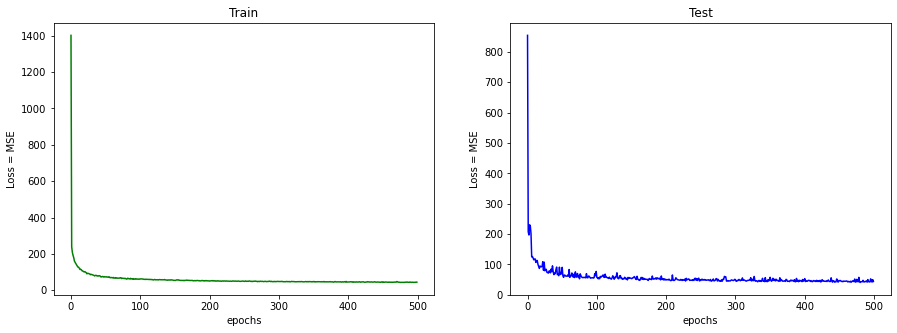

In [22]:
#breakfast hour
# plot train and test loss (mse)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(a_history_nn.history['loss'], color = 'green')
ax[1].plot(a_history_nn.history['val_loss'], color = 'blue')

ax[0].set_title('Train')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Loss = MSE')

ax[1].set_title('Test')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Loss = MSE');

In [23]:
# https://medium.com/towards-data-science/loss-functions-and-their-use-in-neural-networks-a470e703f1e9
a_nn_y_true = a_y_nn_test
a_nn_y_pred = a_model_nn.predict(a_X_nn_test_sc)

# R2
R2 = metrics.r2_score(a_nn_y_true, a_nn_y_pred)
print(f'R2: {R2}')

# MAE
mae = MeanAbsoluteError()
print(f'Mean Absolute Error: {mae(a_nn_y_true, a_nn_y_pred)}')

# Huber
huber = Huber()
print(f'Huber Loss: {huber(a_nn_y_true, a_nn_y_pred)}')

118/118 [==============================] - 0s 956us/step


NameError: name 'metrics' is not defined

In [ ]:
# save model
# a_model_nn.save('../data/average/a_model_nn.h5')

# Average Cycling Performance Best Model
---